In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import os
import csv
%pprint

Pretty printing has been turned ON


In [2]:
os.listdir("labels")

['HarvardOxford-Subcortical.xml', 'HarvardOxford-Cortical.xml']

In [3]:
with open('labels/HarvardOxford-Subcortical.xml', 'r') as f:
    subcort = f.read()
with open('labels/HarvardOxford-Cortical.xml', 'r') as f:
    cort = f.read()

In [4]:
subcort_soup = BeautifulSoup(subcort, "xml")
cort_soup = BeautifulSoup(cort, "xml")

In [5]:
subcort_labels = {}
for x in subcort_soup.find_all('label'):
    num = int(str(x).split('index=')[1].split('"')[1])
    parcel = str(x).split('>')[-2].split('<')[0]
    subcort_labels[num] = parcel

In [6]:
cort_labels = {}
for x in cort_soup.find_all('label'):
    num = int(str(x).split('index=')[1].split('"')[1])
    parcel = str(x).split('>')[-2].split('<')[0]
    cort_labels[num] = parcel

In [7]:
cort_labels

{0: 'Frontal Pole', 1: 'Insular Cortex', 2: 'Superior Frontal Gyrus', 3: 'Middle Frontal Gyrus', 4: 'Inferior Frontal Gyrus, pars triangularis', 5: 'Inferior Frontal Gyrus, pars opercularis', 6: 'Precentral Gyrus', 7: 'Temporal Pole', 8: 'Superior Temporal Gyrus, anterior division', 9: 'Superior Temporal Gyrus, posterior division', 10: 'Middle Temporal Gyrus, anterior division', 11: 'Middle Temporal Gyrus, posterior division', 12: 'Middle Temporal Gyrus, temporooccipital part', 13: 'Inferior Temporal Gyrus, anterior division', 14: 'Inferior Temporal Gyrus, posterior division', 15: 'Inferior Temporal Gyrus, temporooccipital part', 16: 'Postcentral Gyrus', 17: 'Superior Parietal Lobule', 18: 'Supramarginal Gyrus, anterior division', 19: 'Supramarginal Gyrus, posterior division', 20: 'Angular Gyrus', 21: 'Lateral Occipital Cortex, superior division', 22: 'Lateral Occipital Cortex, inferior division', 23: 'Intracalcarine Cortex', 24: 'Frontal Medial Cortex', 25: 'Juxtapositional Lobule Cor

For that HBN thing... it's only 1 subject... so should be semi-quick
+ correlate MSSD, Lag1, and sample_entropy
    + take all the run1 MSSD values (for all ROIs) and correlates them with run2 MSSD values
    + then do that for Lag1... run1 and run2
    + and then sample_entropy run1 and run2

In [8]:
subjects = list(set([x.split("-")[0] for x in os.listdir() if x.endswith(".tsv")]))
subjects

['NDARYE576WR6', 'NDARRV217VTA', 'NDARPV412JEN', 'NDARAM357BUA', 'NDARYX853TAX', 'NDARRW536ZM2', 'NDARNH285EWA', 'NDARXL801JVG', 'NDARDX173WLD', 'NDARKN742LEV', 'NDARFP841PDJ', 'NDARCA146GG1', 'NDARHV358ZCU', 'NDAREC777ADZ', 'NDARDT550XYX', 'NDARNH766CU7', 'NDARPL440BX5', 'NDARCD182XT1', 'NDARGL289TB8', 'NDAREK686WN1', 'NDARLB291FBV', 'NDARTC795CR3', 'NDARGY639ANB', 'NDARZT581RNV', 'NDARDR304HHJ', 'NDARGJ392ACY', 'NDARUX187JTB', 'NDARPH567WUB', 'NDARNN761ZPA', 'NDARDJ204EPU', 'NDARHD546PDX', 'NDARMA273ZL6', 'NDARZA982YTP', 'NDARXT196WPG', 'NDARKL156NJG', 'NDARJJ173BRX', 'NDARZA034RW7', 'NDARNH170TJU', 'NDARNN042YCH', 'NDARPY302MV9', 'NDARAL897CYV', 'NDARFV058BWM', 'NDARBF042LDM', 'NDARZZ993CEV']

In [9]:
def getRun1Cort(subj):
    return subj+"-1_cort_extracted-features.tsv"
def getRun2Cort(subj):
    return subj+"-2_cort_extracted-features.tsv"
def getRun1Subcort(subj):
    return subj+"-1_subcort_extracted-features.tsv"
def getRun2Subcort(subj):
    return subj+"-2_subcort_extracted-features.tsv"

In [10]:
getRun1Cort(subjects[0])

'NDARYE576WR6-1_cort_extracted-features.tsv'

In [11]:
def getMSSDCort(subj):
    mssd_dict1 = {}
    mssd_dict2 = {}
    f1 = getRun1Cort(subj)
    f2 = getRun2Cort(subj)
    with open(f1) as csvfile:
        reader = csv.DictReader(csvfile, delimiter='\t')
        for row in reader:
            mssd_dict1[int(row[''])]=float(row['MSSD'])
    with open(f2) as csvfile2:
        reader2 = csv.DictReader(csvfile2, delimiter='\t')
        for row in reader2:
            mssd_dict2[int(row[''])]=float(row['MSSD'])
    return mssd_dict1, mssd_dict2

In [12]:
def getMSSDSubcort(subj):
    mssd_dict1 = {}
    mssd_dict2 = {}
    f1 = getRun1Subcort(subj)
    f2 = getRun2Subcort(subj)
    
    with open(f1) as csvfile:
        reader = csv.DictReader(csvfile, delimiter='\t')
        for row in reader:
            mssd_dict1[int(row[''])]=float(row['MSSD'])
            
    with open(f2) as csvfile2:
        reader2 = csv.DictReader(csvfile2, delimiter='\t')
        for row in reader2:
            mssd_dict2[int(row[''])]=float(row['MSSD'])
    return mssd_dict1, mssd_dict2

In [13]:
def getLag1Cort(subj):
    Lag1_dict1 = {}
    Lag1_dict2 = {}
    f1 = getRun1Cort(subj)
    f2 = getRun2Cort(subj)
    with open(f1) as csvfile:
        reader = csv.DictReader(csvfile, delimiter='\t')
        for row in reader:
            Lag1_dict1[int(row[''])]=float(row['Lag1'])
    with open(f2) as csvfile2:
        reader2 = csv.DictReader(csvfile2, delimiter='\t')
        for row in reader2:
            Lag1_dict2[int(row[''])]=float(row['Lag1'])
    return Lag1_dict1, Lag1_dict2

In [14]:
def getLag1Subcort(subj):
    Lag1_dict1 = {}
    Lag1_dict2 = {}
    f1 = getRun1Subcort(subj)
    f2 = getRun2Subcort(subj)
    
    with open(f1) as csvfile:
        reader = csv.DictReader(csvfile, delimiter='\t')
        for row in reader:
            Lag1_dict1[int(row[''])]=float(row['Lag1'])
            
    with open(f2) as csvfile2:
        reader2 = csv.DictReader(csvfile2, delimiter='\t')
        for row in reader2:
            Lag1_dict2[int(row[''])]=float(row['Lag1'])
    return Lag1_dict1, Lag1_dict2

In [15]:
def getSampleEntropyCort(subj):
    sample_entropy_dict1 = {}
    sample_entropy_dict2 = {}
    f1 = getRun1Cort(subj)
    f2 = getRun2Cort(subj)
    with open(f1) as csvfile:
        reader = csv.DictReader(csvfile, delimiter='\t')
        for row in reader:
            sample_entropy_dict1[int(row[''])]=float(row['sample_entropy'])
    with open(f2) as csvfile2:
        reader2 = csv.DictReader(csvfile2, delimiter='\t')
        for row in reader2:
            sample_entropy_dict2[int(row[''])]=float(row['sample_entropy'])
    return sample_entropy_dict1, sample_entropy_dict2

In [16]:
def getSampleEntropySubcort(subj):
    sample_entropy_dict1 = {}
    sample_entropy_dict2 = {}
    f1 = getRun1Subcort(subj)
    f2 = getRun2Subcort(subj)
    
    with open(f1) as csvfile:
        reader = csv.DictReader(csvfile, delimiter='\t')
        for row in reader:
            sample_entropy_dict1[int(row[''])]=float(row['sample_entropy'])
            
    with open(f2) as csvfile2:
        reader2 = csv.DictReader(csvfile2, delimiter='\t')
        for row in reader2:
            sample_entropy_dict2[int(row[''])]=float(row['sample_entropy'])
    return sample_entropy_dict1, sample_entropy_dict2

In [17]:
getMSSDCort(subjects[0])

({0: 88.70366573962335, 1: 62.67446996316977, 2: 106.58494508989675, 3: 121.75404638560128, 4: 221.08717722377273, 5: 134.96498565859852, 6: 103.98809175579726, 7: 20.60632259815062, 8: 322.04248052315813, 9: 193.78416849143244, 10: 98.78935755269488, 11: 64.80354986885334, 12: 245.43449911887762, 13: 117.48544680314691, 14: 65.86389336702373, 15: 279.55272466825085, 16: 111.31965841498196, 17: 181.52754508503205, 18: 168.22641780209827, 19: 227.39011009715801, 20: 326.866106521135, 21: 357.452936793195, 22: 352.44031793307903, 23: 744.5466312990817, 24: 95.38749366711694, 25: 134.96910433989052, 26: 76.87714658376463, 27: 130.2971801530735, 28: 74.6432406813666, 29: 138.98027662879068, 30: 263.80031749595776, 31: 1820.9274786721792, 32: 59.41863936405389, 33: 86.37675546192771, 34: 166.11179221920122, 35: 279.9392295824898, 36: 94.44954495269553, 37: 63.017101232055, 38: 223.17849053263888, 39: 603.1801889876349, 40: 132.79794158546068, 41: 91.25688774148995, 42: 156.1859525823577, 43

In [18]:
test1cort, test2cort = getMSSDCort(subjects[0])

In [19]:
test1sub, test2sub = getMSSDSubcort(subjects[0])

In [20]:
test1cort

{0: 88.70366573962335, 1: 62.67446996316977, 2: 106.58494508989675, 3: 121.75404638560128, 4: 221.08717722377273, 5: 134.96498565859852, 6: 103.98809175579726, 7: 20.60632259815062, 8: 322.04248052315813, 9: 193.78416849143244, 10: 98.78935755269488, 11: 64.80354986885334, 12: 245.43449911887762, 13: 117.48544680314691, 14: 65.86389336702373, 15: 279.55272466825085, 16: 111.31965841498196, 17: 181.52754508503205, 18: 168.22641780209827, 19: 227.39011009715801, 20: 326.866106521135, 21: 357.452936793195, 22: 352.44031793307903, 23: 744.5466312990817, 24: 95.38749366711694, 25: 134.96910433989052, 26: 76.87714658376463, 27: 130.2971801530735, 28: 74.6432406813666, 29: 138.98027662879068, 30: 263.80031749595776, 31: 1820.9274786721792, 32: 59.41863936405389, 33: 86.37675546192771, 34: 166.11179221920122, 35: 279.9392295824898, 36: 94.44954495269553, 37: 63.017101232055, 38: 223.17849053263888, 39: 603.1801889876349, 40: 132.79794158546068, 41: 91.25688774148995, 42: 156.1859525823577, 43:

In [21]:
test1sub

{0: 28.442799382972492, 1: 79.9033034515786, 2: 102.03949369745793, 3: 72.37917177630669, 4: 112.27786305632254, 5: 54.02867703274875, 6: 136.0794691697137, 7: 24.718907669167727, 8: 81.91572526762012, 9: 208.6874121031495, 10: 380.80824489081726, 11: 33.44259009437575, 12: 98.91630848040887, 13: 144.18575399210636, 14: 73.1769599377284, 15: 96.01191423200068, 16: 56.55184482618814, 17: 124.35602429768261, 18: 81.68827076343403, 19: 281.6295722321088, 20: 669.4096950669949}

In [44]:
def compareMSSDCort(subj):
    mssd1, mssd2 = getMSSDCort(subj)
    x1 = []
    x2 = []
    for key in mssd1.keys():
        x1.append(mssd1[key])
        x2.append(mssd2[key])
    return np.corrcoef(x1,x2)[0][1]

In [45]:
def compareMSSDSubcort(subj):
    mssd1, mssd2 = getMSSDSubcort(subj)
    x1 = []
    x2 = []
    for key in mssd1.keys():
        x1.append(mssd1[key])
        x2.append(mssd2[key])
    return np.corrcoef(x1,x2)[0][1]

In [46]:
def compareLag1Cort(subj):
    Lag11, Lag12 = getLag1Cort(subj)
    x1 = []
    x2 = []
    for key in Lag11.keys():
        x1.append(Lag11[key])
        x2.append(Lag12[key])
    return np.corrcoef(x1,x2)[0][1]

In [47]:
def compareLag1Subcort(subj):
    Lag11, Lag12 = getLag1Subcort(subj)
    x1 = []
    x2 = []
    for key in Lag11.keys():
        x1.append(Lag11[key])
        x2.append(Lag12[key])
    return np.corrcoef(x1,x2)[0][1]

In [48]:
def compareSampleEntropyCort(subj):
    sample_entropy1, sample_entropy2 = getSampleEntropyCort(subj)
    x1 = []
    x2 = []
    for key in sample_entropy1.keys():
        x1.append(sample_entropy1[key])
        x2.append(sample_entropy2[key])
    return np.corrcoef(x1,x2)[0][1]

In [49]:
def compareSampleEntropySubcort(subj):
    sample_entropy1, sample_entropy2 = getSampleEntropySubcort(subj)
    x1 = []
    x2 = []
    for key in sample_entropy1.keys():
        x1.append(sample_entropy1[key])
        x2.append(sample_entropy2[key])
    return np.corrcoef(x1,x2)[0][1]

In [128]:
def compareMSSDCortAll(subj_list):
    correlations = []
    for subj in subj_list:
        correlations.append(compareMSSDCort(subj))
    col1 = [x+"_run-1" for x in subj_list]
    col2 = [x+"_run-2" for x in subj_list]
    heatmap_df = pd.DataFrame([col1, col2, correlations]).T
    heatmap_df.columns = ["run-1","run-2","corr"]
    heatmap_df = heatmap_df.pivot("run-1","run-2","corr")
    heatmap_df.fillna(0, inplace=True)
    return heatmap_df

In [270]:
def compareAll(subj_list):
    
    MSSD_cort_correlations = []
    MSSD_subcort_correlations = []
    
    Lag1_cort_correlations = []
    Lag1_subcort_correlations = []
    
    sample_entropy_cort_correlations = []
    sample_entropy_subcort_correlations = []
    
    for subj in subj_list:
        
        MSSD_cort_correlations.append(compareMSSDCort(subj))
        MSSD_subcort_correlations.append(compareMSSDSubcort(subj))
        
        Lag1_cort_correlations.append(compareLag1Cort(subj))
        Lag1_subcort_correlations.append(compareLag1Subcort(subj))
        
        sample_entropy_cort_correlations.append(compareSampleEntropyCort(subj))
        sample_entropy_subcort_correlations.append(compareSampleEntropySubcort(subj))
    
    index1 = ["MSSD","Lag1","sample_entropy","MSSD","Lag1","sample_entropy"]
    index2 = ["cortical","cortical","cortical",
             "subcortical","subcortical", "subcortical"]
    
    mux = pd.MultiIndex.from_arrays([index2, index1], names=["parcellation","value"])
    
    heatmap_df = pd.DataFrame([
        MSSD_cort_correlations, Lag1_cort_correlations, sample_entropy_cort_correlations,
        MSSD_subcort_correlations, Lag1_subcort_correlations, sample_entropy_subcort_correlations
    ], columns = subj_list, index = mux)
    
    # heatmap_df.reset_index(inplace=True)
    
    heatmap_df.columns.name = "subject"
    
    #return heatmap_df
    return heatmap_df.T

In [271]:
heatmap_df = compareAll(subjects)

In [272]:
heatmap_df.head()

parcellation  cortical                          subcortical            \
value             MSSD      Lag1 sample_entropy        MSSD      Lag1   
subject                                                                 
NDARYE576WR6  0.998004  0.925512       0.871302    0.978690  0.940847   
NDARRV217VTA  0.988275  0.874606       0.910482    0.992353  0.910049   
NDARPV412JEN  0.998274  0.870246       0.883176    0.993826  0.871040   
NDARAM357BUA  0.985716  0.916857       0.869277    0.995152  0.927670   
NDARYX853TAX  0.955366  0.773458       0.615554    0.946312  0.699430   

parcellation                 
value        sample_entropy  
subject                      
NDARYE576WR6       0.940880  
NDARRV217VTA       0.938893  
NDARPV412JEN       0.947806  
NDARAM357BUA       0.943650  
NDARYX853TAX       0.666863

In [290]:
cort_df = heatmap_df["cortical"]
subcort_df = heatmap_df["subcortical"]

In [314]:
sns.set(font_scale=1.25)

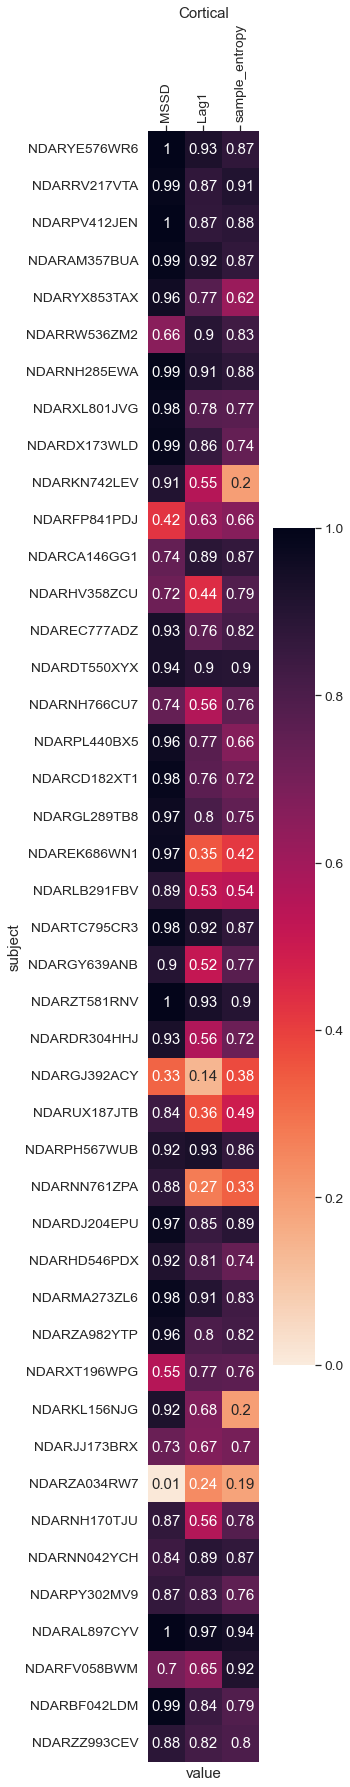

In [388]:
plt.figure(figsize=(5,30))
g = sns.heatmap(cort_df, square=True, annot=True, vmin=0, vmax=1, cmap="rocket_r")
g.xaxis.set_ticks_position("top")
plt.xticks(rotation=90)
plt.title('Cortical')
plt.savefig("cortical correlations.png", dpi=300)

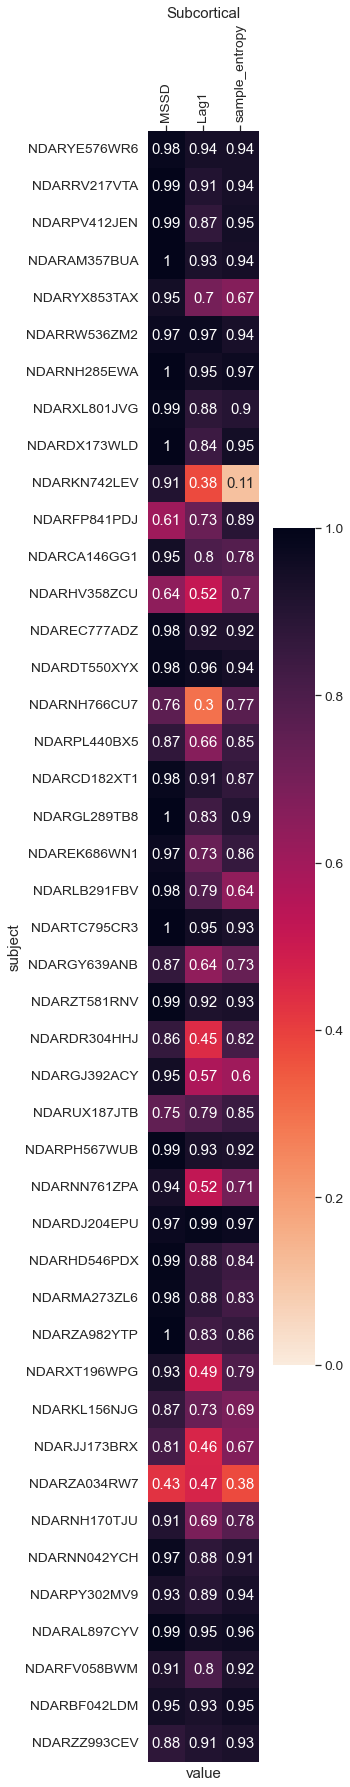

In [389]:
plt.figure(figsize=(5,30))
g = sns.heatmap(subcort_df, square=True, annot=True, vmin=0, vmax=1, cmap="rocket_r")
g.xaxis.set_ticks_position("top")
plt.xticks(rotation=90)
plt.title('Subcortical')
plt.savefig("subcortical correlations.png", dpi=300)

In [364]:
def compareAllAlternate(subj_list):
    
    MSSD_cort_correlations = []
    MSSD_subcort_correlations = []
    
    Lag1_cort_correlations = []
    Lag1_subcort_correlations = []
    
    sample_entropy_cort_correlations = []
    sample_entropy_subcort_correlations = []
    
    for subj in subj_list:
        
        MSSD_cort_correlations.append(compareMSSDCort(subj))
        MSSD_subcort_correlations.append(compareMSSDSubcort(subj))
        
        Lag1_cort_correlations.append(compareLag1Cort(subj))
        Lag1_subcort_correlations.append(compareLag1Subcort(subj))
        
        sample_entropy_cort_correlations.append(compareSampleEntropyCort(subj))
        sample_entropy_subcort_correlations.append(compareSampleEntropySubcort(subj))
    
    all_correlations = MSSD_cort_correlations + MSSD_subcort_correlations + Lag1_cort_correlations + Lag1_subcort_correlations + sample_entropy_cort_correlations + sample_entropy_subcort_correlations
    all_metric = ["MSSD"] * len(MSSD_cort_correlations) + ["MSSD"] * len(MSSD_subcort_correlations) + ["Lag1"] * len(Lag1_cort_correlations) + ["Lag1"] * len(Lag1_subcort_correlations) + ["sample_entropy"] * len(sample_entropy_cort_correlations) + ["sample_entropy"] * len(sample_entropy_subcort_correlations)
    all_parcellation = ["cortical"] * len(MSSD_cort_correlations) + ["subcortical"] * len(MSSD_subcort_correlations) + ["cortical"] * len(Lag1_cort_correlations) + ["subcortical"] * len(Lag1_subcort_correlations) + ["cortical"] * len(sample_entropy_cort_correlations) + ["subcortical"] * len(sample_entropy_subcort_correlations)
    all_subj = subj_list*6
    
    df = pd.DataFrame([all_subj, all_correlations, all_metric, all_parcellation]).T
    df.columns = ["subject","corr","metric","parcellation"]
    return df

In [366]:
alt_df = compareAllAlternate(subjects)

In [367]:
alt_df.head()

,subject,corr,metric,parcellation
0,NDARYE576WR6,0.998004,MSSD,cortical
1,NDARRV217VTA,0.988275,MSSD,cortical
2,NDARPV412JEN,0.998274,MSSD,cortical
3,NDARAM357BUA,0.985716,MSSD,cortical
4,NDARYX853TAX,0.955366,MSSD,cortical


In [372]:
alt_df.loc[alt_df["subject"]=="NDARYE576WR6"]

,subject,corr,metric,parcellation
0,NDARYE576WR6,0.998004,MSSD,cortical
44,NDARYE576WR6,0.97869,MSSD,subcortical
88,NDARYE576WR6,0.925512,Lag1,cortical
132,NDARYE576WR6,0.940847,Lag1,subcortical
176,NDARYE576WR6,0.871302,sample_entropy,cortical
220,NDARYE576WR6,0.94088,sample_entropy,subcortical


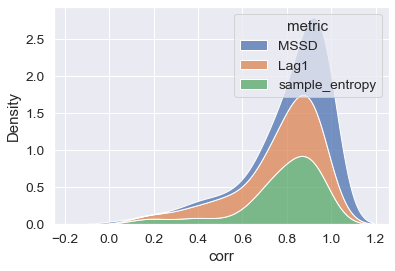

In [454]:
g = sns.kdeplot(data=alt_df, x="corr", hue="metric", multiple="stack")

In [442]:
np.linspace(0,1,11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [458]:
temp1 = ["MSSD","Lag1","sample_entropy"]
temp2 = sns.color_palette("husl", 3)
legend_dict = {temp1[i]:temp2[i] for i in range(3)}

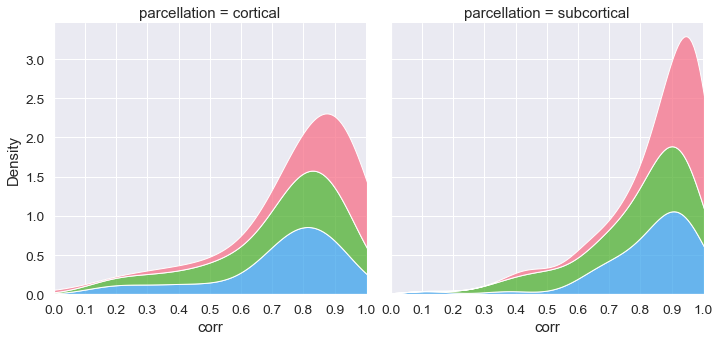

In [479]:
g = sns.FacetGrid(alt_df, col="parcellation", height=5)
kde_plot = g.map_dataframe(sns.kdeplot, x="corr", hue="metric", multiple="stack", palette=sns.color_palette("husl", 3))
for _, ax in g.axes_dict.items():
    ax.set_xlim(0,1)
    ax.set_xticks(np.linspace(0,1,11))
g.add_legend()
plt.savefig("distributions.png", dpi=300)

In [144]:
mask = np.array(temp)
mask[mask==0]=1
mask[mask<1]=0

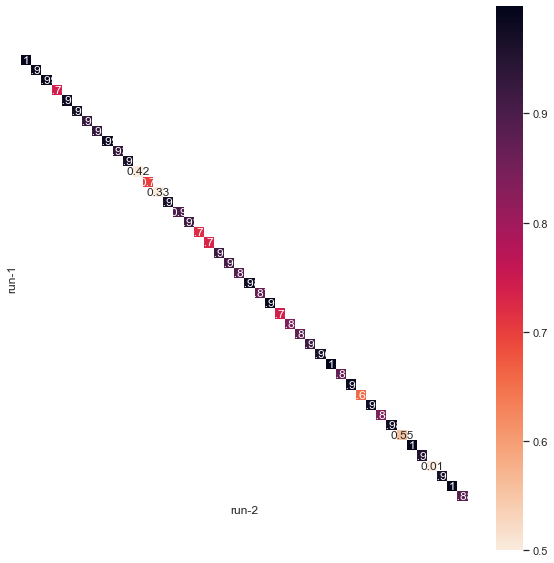

In [169]:
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    sns.heatmap(compareMSSDCortAll(subjects), cmap = "rocket_r", mask=mask, annot=True, vmin=.5, 
                square=True, xticklabels=False, yticklabels=False)

In [50]:
compareMSSDCort(subjects[0])

0.9980037880545154

In [51]:
compareMSSDSubcort(subjects[0])

0.9786900808790301

In [52]:
compareLag1Cort(subjects[0])

0.9255121081123497

In [53]:
compareLag1Subcort(subjects[0])

0.9408467906674851

In [54]:
compareSampleEntropyCort(subjects[0])

0.8713023450985331

In [55]:
compareSampleEntropySubcort(subjects[0])

0.9408797214221549